In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
from keras.applications import VGG16
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [3]:
vgg_conv = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(96, 96, 3),
    classes = 1
)

In [4]:
for layer in vgg_conv.layers[:-8]:
    layer.trainable = False

In [5]:
x = vgg_conv.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(2, activation="softmax")(x)
model = tf.keras.Model(vgg_conv.input, x)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

C:\Users\Priyanshu\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [7]:
import scipy as sp

In [8]:
def plot_activation(img):
    pred = model.predict(img[np.newaxis,:,:,:])
    pred_class = np.argmax(pred)
    weights = model.layers[-1].get_weights()[0]
    class_weights = weights[:, pred_class]
    intermediate = tf.keras.Model(model.input,
                         model.get_layer("block5_conv3").output)
    conv_output = intermediate.predict(img[np.newaxis,:,:,:])
    conv_output = np.squeeze(conv_output)
    h = int(img.shape[0]/conv_output.shape[0])
    w = int(img.shape[1]/conv_output.shape[1])
    act_maps = sp.ndimage.zoom(conv_output, (h, w, 1), order=1)
    out = np.dot(act_maps.reshape((img.shape[0]*img.shape[1],512)), 
                 class_weights).reshape(img.shape[0],img.shape[1])
    plt.imshow(img.astype('float32').reshape(img.shape[0],
               img.shape[1],3))
    plt.imshow(out, cmap='jet', alpha=0.35)
    plt.title('Crack' if pred_class == 1 else 'No Crack')

In [9]:
import cv2
import glob
import matplotlib.image as mpimg
import pandas

In [10]:
image = glob.glob("D:/Other Projects/Crack detection/crack_data2/Positive/00001.jpg")
n = cv2.imread ("D:/Other Projects/Crack detection/crack_data2/Positive/00001.jpg")

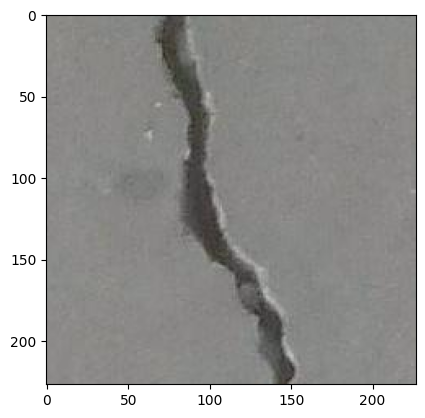

In [11]:
plt.imshow (n)
n = cv2.resize (n, (96, 96))

1/1 [==============================] - 0s 193ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


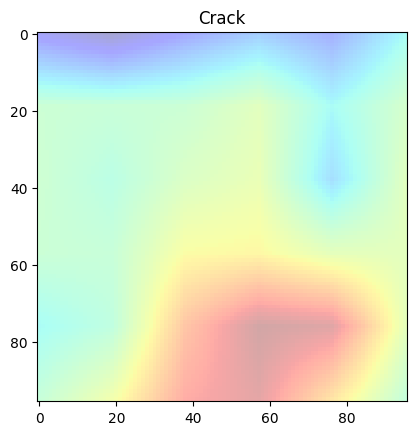

In [13]:
plot_activation (n)